## CRAGIG Runs 1 and 2 through ipyrad

**20170605**

I'm going to run all my current scallop RAD data through the ipyrad pipeline because as of yet I have only run it on ten samples at a time to get the hang of it and to see preliminary differences between Stacks and ipyrad.

First, I need to demultiplex my two lanes of data. For each, I'll make a unique params file for each library and then I'll merge them together.

The two params files will differ only in the location of the raw data fastq file and the barcodes files.

cragig007 will be for CRAGIG_run1 and cragig008 will be for CRAGIG_run2

This is what's in cragig007:

In [2]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py


In [8]:
ls

barcodes_cragigrun1.txt*  params-cragig007.txt*
barcodes_cragigrun2.txt*  popmap_cragig007.txt*


In [11]:
!head -n 30 params-cragig007.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig007                      ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
./                             ## [1] [project_dir]: Project dir (made in curdir if not present)
../../../Data/CRAGIG_RUN1_rawdata/161228_I137_FCHCYV5BBXX_L5_CHKPE85216120009_2.fq.gz                               ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
./barcodes_cragigrun1.txt     ## [3] [barcodes_path]: Location of barcodes file
                              ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,      

In [17]:
!ipyrad -p params-cragig007.txt -s 1


 -------------------------------------------------------------
  ipyrad [v.0.6.20]
  Interactive assembly and analysis of RAD-seq data
 -------------------------------------------------------------

  A new version of ipyrad is available (v.0.6.27). To upgrade run:

    conda install -c ipyrad ipyrad


 -------------------------------------------------------------
  ipyrad [v.0.6.20]
  Interactive assembly and analysis of RAD-seq data
 -------------------------------------------------------------
  New Assembly: cragig007
  host compute node: [6 cores] on ubuntu

  Step 1: Demultiplexing fastq data to Samples
  [####################] 100%  sorting reads         | 1:26:47  es  | 0:25:59  
  [####################] 100%  writing/compressing   | 0:37:57  



In [ ]:
!ipyrad -p params-cragig008.txt -s 1


 -------------------------------------------------------------
  ipyrad [v.0.6.20]
  Interactive assembly and analysis of RAD-seq data
 -------------------------------------------------------------

  A new version of ipyrad is available (v.0.6.27). To upgrade run:

    conda install -c ipyrad ipyrad


 -------------------------------------------------------------
  ipyrad [v.0.6.20]
  Interactive assembly and analysis of RAD-seq data
 -------------------------------------------------------------
  New Assembly: cragig008
  host compute node: [6 cores] on ubuntu

  Step 1: Demultiplexing fastq data to Samples
  [##################  ]  92%  sorting reads         | 0:39:39  

It kept crashing the jupyter notebook so I'm starting to run these outside the terminal. For some reason, even though I merged assemblies, it only ran on the first 71 samples. Here's what the params file looked like:

In [2]:
!head -n 30 params-cragig009.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig009                      ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py ## [1] [project_dir]: Project dir (made in curdir if not present)
Merged: cragig007, cragig008   ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
Merged: cragig007, cragig008   ## [3] [barcodes_path]: Location of barcodes file
Merged: cragig007, cragig008   ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,                        ## [8] [restriction_overhang]: Restrictio

## Trouble!

**20170608**

Aw bummer. It looks like the fastsq files for both cragig007 and cragig0008 are the same, so I might have goofed in what files I fed it. Double-checking the params files now... Found it! I didn't use the correct barcodes file (I used the one for CRAGIG_run1 for both cragig007 and cragig008). Going to double-check the params files and rerun.

Watching it rerun and ipyrad knows to delete all old files when I force the step to rewrite over the previous version. That's pretty cool!

I'm not totally sure that I know how to use the merge operation well yet, as it spit out an error during Step 2:
```
ERROR 	IPyradError(error in: ['cat', '/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig007_fastqs/FG034_R1_.fastq.gz', '/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig008_fastqs/FG034_R1_.fastq.gz'], None)
```

I'm going to rerun evertyhing from the start, and double-check I have the merge function well understood.

**20170609**

I read the documentation more carefully and indeed I understand everything right. My mistake was that I accidentally used the same barcodes file, which meant ipyrad thought that I wanted to concatenate data from different fastq files into the same sample. Then, when it couldn't find things to concatenate, it got confused. The command to merge multiple libraries from multiple lanes is the same as one library in multiple lanes, it just results in a different outcome. Running now!

**20170612**

The pipeline ran totally fine except during Step 7 I got this error message:

```
ERROR:ipyrad.core.assembly:IPyradWarningExit: 
    Exception: empty varcounts array. This could be because no samples 
    passed filtering, or it could be because you have overzealous filtering.
    Check the values for `trim_loci` and make sure you are not trimming the
    edge too far

```

I checked the ``trim_loci`` parameter, and I have it set to 0,0,0,0 which means it doesn't trim edges at all, so I don't think that the values for ``trim_loci`` were the problem.

I made a list of all the parameters that affect Step 7 to see if I could check each one/trouble-shoot.

- 18 - max alleles consens
- 21 - min samples locus
- 22 - max SNPs locus
- 23 - max indels locus
- 24 - max shared Hs locus
- 26 - trim loci
- 27 - output formats
- 28 - pop assign file

I went through the stats output files for each step to see if it's obvious where the samples are getting filtered out. Here, I'll compare to the params file from my test run of ipyrad on 10 scallops and that assembly's output stats files.

## Trouble-shooting

### Comparing params files of cragig009 and test run that worked fine

Parameters from the list above that differed:
* **21 - min samples locus**: was set to 4 (4 samples per locus required to report to output) in cragig004 and to 70 for cragig009. But, cragig004 only had 10 samples so 4/10 = 40% and cragig009 had 143 samples, so 70/143 = 49%, which isn't that different. I have trouble believing this would be the culprit for the difference in outcomes, but it'd be worth a shot to reduce it. 

Aaand that's the only paramter that's different from the list. Weird! I just chatted with some lab mates who don't think that that should have created the result that I'm seeing (no samples making it through filtering).

Let's try the infamous "Have you tried powering it off, and back on again?" and forcing to rerun Step 7.

Bummer - got the same error message.

Now I'm going to try lowering the value for parameter 21 from 70 to 25 and then seeing if that changes anything. I'll do this through a branching assembly and naming the branch cragig010. Now running Step 7 of cragig010...

Oh no! I got the same exact error message. This makes me think that it's not parameter 21, although just to be doubly sure, I'm going to make cragig011 and set the value to 4 as it was in cragig004. And, I got the same error message again. It's not that parameter. I'm now going to compare the stats output files from the test run (cragig004) and cragig009 to see which step before Step 7 could have caused this issue.

### Comparing output stats files from different steps in cragig009 and test run that worked fine

I have no good way of looking at any singular stats output file and discerning whether the step is overzealous in it's filtering, or causing some issue. But, cragig004-006 all produced a normal seeming number of loci, and all samples made it through filtering steps with pretty much the same parameters. So I'm going to compare those to see if I can pinpoint what is different between cragig004-006 and cragig009 that may have caused this issue.

#### s3_cluster_stats.txt

Visually, these files seem to have really similar values. 

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/comp_s3_cragig004_009.png?raw=true)

Below, I practiced using Kolmogorov–Smirnov test from ``scipy`` which said the distributions are different, and I'm not sure why that is when visually they look so similar. I wonder if it just as to do with sample size, as cragig009 has 14x as many samples as cragig004.



In [6]:
from scipy.stats import ks_2samp

In [9]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py


In [11]:
s3_009 = open("cragig009_clust_0.85/s3_cluster_stats.txt","r")
s3_009_lines = s3_009.readlines()
s3_009.close()

clusters_total_009 = []
clusters_hidepth_min_009 = []
avg_depth_total_009 = []
avg_depth_mj_009 = []
sd_depth_total_009 = []
sd_depth_mj_009 = []

for line in s3_009_lines[1:]: # iterate over lines, exclude header
    linelist = line.strip().split()
    clusters_total_009.append(float(linelist[1]))
    clusters_hidepth_min_009.append(float(linelist[3])) 
    avg_depth_total_009.append(float(linelist[4]))
    avg_depth_mj_009.append(float(linelist[5]))
    sd_depth_total_009.append(float(linelist[7]))
    sd_depth_mj_009.append(float(linelist[8]))

In [15]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


In [17]:
s3_004 = open("cragig004_clust_0.85/s3_cluster_stats.txt","r")
s3_004_lines = s3_004.readlines()
s3_004.close()

clusters_total_004 = []
clusters_hidepth_min_004 = []
avg_depth_total_004 = []
avg_depth_mj_004 = []
sd_depth_total_004 = []
sd_depth_mj_004 = []

for line in s3_004_lines[1:]: # iterate over lines, exclude header
    linelist = line.strip().split()
    clusters_total_004.append(float(linelist[1]))
    clusters_hidepth_min_004.append(float(linelist[3])) 
    avg_depth_total_004.append(float(linelist[4]))
    avg_depth_mj_004.append(float(linelist[5]))
    sd_depth_total_004.append(float(linelist[7]))
    sd_depth_mj_004.append(float(linelist[8]))

In [19]:
ks_2samp(clusters_total_004,clusters_total_009)

Ks_2sampResult(statistic=0.51118881118881121, pvalue=0.009070706460590371)

In [20]:
ks_2samp(clusters_hidepth_min_004,clusters_hidepth_min_009)

Ks_2sampResult(statistic=0.41118881118881118, pvalue=0.060924309190217511)

In [21]:
ks_2samp(avg_depth_total_004,avg_depth_total_009)

Ks_2sampResult(statistic=0.49020979020979022, pvalue=0.01399709655173435)

In [22]:
ks_2samp(avg_depth_mj_004,avg_depth_mj_009)

Ks_2sampResult(statistic=0.4972027972027972, pvalue=0.012137132869640509)

In [23]:
ks_2samp(sd_depth_total_004,sd_depth_total_009)

Ks_2sampResult(statistic=0.68321678321678325, pvalue=0.00013032710397125613)

In [24]:
ks_2samp(sd_depth_mj_004,sd_depth_mj_009)

Ks_2sampResult(statistic=0.65524475524475523, pvalue=0.00028234576079832346)

#### s4_joint_estimate.txt

Visually, the joint estimates of error and heterozygosity also don't look dramatically different:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/comp_s4_cragig004-009.png?raw=true)

#### s5_consens_stats.txt

Visually, the consensus base calling results don't look dramatically different either:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/comp_s5_cragig004-009.png?raw=true)

#### s6_cluster_stats.txt

Visually, the results from clustering consensus sequences do look a a little different, although it could be due to sample size. I'll need to be sure I understand each part well before I pass judgement.

![imge](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/comp_s6_cragig004_009.png?raw=true)


For example, the number of clusters of consensus sequences was 434,306 (Size min 1, max 7475, avg 7.0) for cragig009 and 76,218 (Size min 1, max 424, avg 2.8), but I'd think that's just the result of differences in sample size. If I understand this step, it's behaving like cstacks and clustering consensus sequences between samples. So, we'd assume that with more samples we'd have more consensus sequences that could be different.

The number of singletons was 339,823 (11.2% of seqs, 78.2% of clusters) for cragig009 and 50,939 (23.6% of seqs, 66.8% of clusters). I imagine that that also has to do with sample size. I interpret a singleton here to mean that some consensus sequences only appear once across samples. But I'm not sure about the distinction between % sequences and % clusters.


### Troubleshooting After Communication with Developers + Peers

**20170613**

Messaged the ipyrad authors and they said that the last line in the population map specifies the minimum number of individuals in a population that a locus must appear in in order to be retained, and that this overrides the min sample param21. So, they advised that I remove the population map and set the min sample param21 pretty low, and let that inform me how high I should set the per population values.

I made a new branch called **cragig012** where I made a new population assignment file and lowered each population number down to 1, and min samples down to 3. This time, Step 7 ran to completion without the error! Looks like there's few loci retained though, on the order of 2000ish per sample.

Ok now - I'll make **cragig013** where I exclude the population assignment file and try 25 for min sample number. Oh no! I got the same error again >.< What a bummer.

I'm going to try **cragig014** where I exclude the population assignment file and also lower min sample number to 10. Huh! None made it through this time either.

As part of this trouble-shooting, it occurred to me that when I ran cragig004-006, that I had a population assignment file with the max number of individuals per population, and it still didn't filter out all my loci (which doesn't make sense to me). I'm curious about what will happen if I remove the population assignment file, and set the min samples locus param21 to 5 (has to be in half the scallops, doesn't matter what population). This will be **cragig015**. That worked, and produced 4773 loci per sample. What about if I lower param21 to 3? Does it affect retained loci predictably? Will do in **cragig016**. Not really - the number of retained loci was almost identical, at 4770 loci per sample.

I'm still confused because when I work with the subset (10 scallops), I can set param21 to half the number of individuals and I still keep 4770 loci, but if I set param21 to 10 out of 143 for the total set of samples, I retain no individuals.

Ok next thing to try - remove FG100_A, which had no retained loci, and see if assembly works fine after that. I manually moved the fastq out of that folder into the directory above it, and then I'm going to make a params file (**cragig017**) that is like cragig009 except I'll set param21 to 10 and exclude a population assignment file. I'm not sure if excluding samples is just a matter of moving fastq files, or if ipyrad calls individuals using the barcodes file or the population assignment file. So trying the fastq file removal idea first. Ugh, same error. Let me see in the stats file if it at least excluded FG100_A. Doesn't look like it got removed.

I got some ubuntu error while **cragig018** was running overnight. I also realized that demutliplexing didn't overwrite my original fastqs, and there was something else I wanted to test before trying demultiplexing again in order to exclude FG100_A, and that was removing whatever file's step 7 must take from (the consensus files of steps 5-6?). Going to poke around the directory structure now.

Worth removing FG100_A files from consens folder and rerunning step 7, although I have a feeling if FG100A messed up the process, that I'd need to repeat all steps that work between samples (at least steps 5 & 6). Ran: ``ipyrad -p params-cragig013.txt -s 7 -f``. Oh no! It didn't work either. Gonna look at the stats out file from step 7 to see whether there were 143 samples in the run (as in, did removing the consens files for FG100A actually remove it from the assembly). Ah! Still 143 samples, so it didn't actually remove FG100A.

This is getting really messy and I'm not getting very far in sorting out what's causing all my samples to get filtered out. Also, I'm going to try rerunning **cragig018** now and getting some dumb error about the temp chunks folder for cragig018 being not empty (even though it looks empty?) so I made **cragig020**, which also excluded the pop assignment file and used barcodes sans replicates. Sweet! That worked. Now I have **cragig021** as the merged assembly. Going to go in and make the rest of the parameters just like **cragig004** (which worked) aka set param13 to 2000, param17 to 35. Also removed population assignment file, and set param21 to 10. Because I still think that's super liberal!

A new error message altogether! **cragig021** ran through step 6 fine, and then in step 7 spit out this error message:
```
  Encountered an unexpected error (see ./ipyrad_log.txt)
  Error message is below -------------------------------
'FG102_A'
```
What's weird is FG102_A isn't the name of any of the samples in this run. However, in **cragig008**, I did use a population assignment file that included that sample, so maybe I just don't know how ipyrad works, and it's confused why there's a sample in the population assignment file and not in the fastqs, consens files, etc. I'm going to try a nifty trick Katherine told me about. You can remove samples from assembly by making a branch and calling:

``ipyrad -p params-file.txt -b branchname - sample1 sample2 sample3``

So, here, I'm running:

``ipyrad -p params-cragig021.txt -b cragig021_sansreps.txt - FG100_A FG100_B FG101_A FG101_B FG102_A FG102_B FG103_A FG103_B FG104_A FG105_B``

Ugh. It says it doesn't know what those sample names are, which is a surprise because it spit out 'FG102_A' as an error. That makes me think that it's using the population assignment file in step 7 to call samples, but there are no files named FG102_A so it's confused. Going to try deleting the population assignment file out of **cragig008** and rerunning step 7 of **cragig021**. Crap. That didn't solve the problem either. Then I tried using the subdata branching thing, where I can specify a list of samples to use in a branch, and I excluded any reps (with As and Bs), and I still got the same error about FG102_A! 

If Katherine doesn't have an easy fix for this, then I'm going to rerun something over the weekend, knowing more now than I did a week ago.

Alright! Decided to just restart from the beginning. Here are the params files.

In [3]:
!head -n 30 params-cragig_lane1_001.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig_lane1_001               ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
./                             ## [1] [project_dir]: Project dir (made in curdir if not present)
/mnt/hgfs/Data/CRAGIG_RUN1/CRAGIG_RUN1_raw_data/161228_I137_FCHCYV5BBXX_L5_CHKPE85216120009_1.fq.gz                              ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
./barcodes_cragigrun1_sansAs.txt   ## [3] [barcodes_path]: Location of barcodes file
                               ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad,

In [4]:
!head -n 30 params-cragig_lane2_001.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig_lane2_001               ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
./                             ## [1] [project_dir]: Project dir (made in curdir if not present)
/mnt/hgfs/Data/CRAGIG_RUN2/CRAGIG_RUN2_rawdata/CRAGIG_RUN2_1.fq.gz ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
./barcodes_cragigrun2.txt      ## [3] [barcodes_path]: Location of barcodes file
                               ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,                        ## [8] [restriction_overhang]

Then I merged these two assembles into the following:

In [5]:
!head -n 30 params-cragig_lanes_12_001.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig_lanes_12_001            ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py ## [1] [project_dir]: Project dir (made in curdir if not present)
Merged: cragig_lane1_001, cragig_lane2_001 ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
Merged: cragig_lane1_001, cragig_lane2_001 ## [3] [barcodes_path]: Location of barcodes file
Merged: cragig_lane1_001, cragig_lane2_001 ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,                        ## [8

## Successful merged assembly of ipyrad

**20170617**

Starting over from the beginning totally worked! Now tto make a branch so I can add a population assignment file for Step 7's output structure file, to read into adegenet and use hierfstat to calculate basic statistics. That branch is called **cragig_lanes_12_002**.

#### Use vcftools to filter for biallelic loci.

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py


In [2]:
!vcftools --vcf cragig_lanes_12_002_outfiles/cragig_lanes_12_002.vcf \
--min-alleles 2 --max-alleles 2 \
--out cragig_lanes_12_002_outfiles/cragig_lanes_12_002_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig_lanes_12_002_outfiles/cragig_lanes_12_002.vcf
	--max-alleles 2
	--min-alleles 2
	--out cragig_lanes_12_002_outfiles/cragig_lanes_12_002_biall
	--recode

After filtering, kept 138 out of 138 Individuals
Outputting VCF file...
After filtering, kept 16473 out of a possible 17479 Sites
Run Time = 3.00 seconds


#### Use pgdspider to make structure file out of biallelic vcf file

Did through the GUI.

#### Get number of loci

Used number of loci reported in vcftools above, so, 16473

#### Add population information to structure file

Just noticed that ipyrad doesn't code population information into the structure files, despite having a population assignment file. Bummer. Going to do that manually here.

In [5]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles


In [6]:
infile = open("add_pop_assignment.str", "r")
infile_lines = infile.readlines()
infile.close()

In [7]:
popfile = open("../popmap_cragig_sansAs.txt","r")
popfile_lines = popfile.readlines()
popfile.close()

In [9]:
popfile_lines[0:5]

['FG009\tpop1\n',
 'FG001\tpop1\n',
 'FG004\tpop1\n',
 'FG011\tpop1\n',
 'FG003\tpop1\n']

In [10]:
popfile_lines[80:85]

['Q248  pop3\n',
 'Q303  pop4\n',
 'Q307  pop4\n',
 'Q357  pop5\n',
 'Q358  pop3\n']

In [14]:
pop_dict = {}
sample_list = []

for line in popfile_lines:
    linelist = line.strip().split()
    sample = linelist[0]
    sample_list.append(sample)
    popnum = linelist[1][-1]
    pop_dict[sample] = popnum

In [15]:
# test to see if worked
pop_dict['Q307']

'4'

In [16]:
lines_for_file = []
lines_for_file.append(infile_lines[0])

for line in infile_lines[1:]: # exclude header
    linelist = line.strip().split()
    samplename = linelist[0]
    newpopnum = pop_dict[samplename]
    genotypes = ""
    for genotype in linelist[2:]: # exclude sample name and pop id columns
        genotypes += genotype + " "
    genotypes = genotypes[:-1] # get rid of last space
    newline = samplename + "\t" + newpopnum + "\t" + genotypes + "\n"
    lines_for_file.append(newline)

In [17]:
outfile = open("str_w_pop_assignment.str","w")
for line in lines_for_file:
    outfile.write(line)
outfile.close()

#### Fis

Awesome! I used adegent and hierfstat to read in the structure file as one population and as multiple, and now need to plot Fis.

In [21]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/cragig_lanes_12_002_edited_outfiles_and_suppl_stats

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/cragig_lanes_12_002_edited_outfiles_and_suppl_stats


In [22]:
fis_file = open("Fis_cragig_lanes_12_002_20170619_asonepop.txt", "r")
fis_file_lines = fis_file.readlines()
fis_file.close()

In [26]:
onepop_fis = []

for line in fis_file_lines[1:]: # exclude header
    linelist = line.strip().split()
    fis = linelist[1]
    if fis != "NA":
        onepop_fis.append(float(fis))

In [26]:
import matplotlib.pyplot as plt
import numpy as np

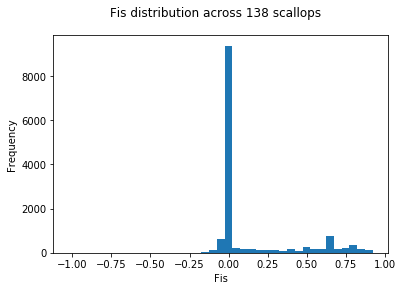

In [29]:
plt.hist(onepop_fis, bins = np.arange(-1,1,.05)-.025)
plt.suptitle("Fis distribution across 138 scallops")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

That looks SO much better than when I did the same thing through Stacks. That's a relief. Next steps would be to plot those exploratory plots that compare read depth, heterozygosity, Fis, etc., and essentially find several ways to trust my data. From there, I can actually try to find loci for Molly's parentage panel.

## One SNP per RAD tag

I want to make some exploratory plots, but first I should filter to just have one SNP per RAD tag. Going to pull the u.str file from the outfiles, convert it to VCF in PGD Spider, then use VCF tools to filter for only biallelic, and then transfer back to .str format.

Need to get number of loci for PGD Spider.

In [13]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles


In [8]:
ustr_file = open("cragig_lanes_12_002.ustr", "r")
ustr_lines = ustr_file.readlines()
ustr_file.close()

In [12]:
firstline = ustr_lines[0]
firstline_list = firstline.strip().split()
print "Your u.str file has " + str(len(firstline_list)-1) + " SNPs"

Your u.str file has 1516 SNPs


In [17]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/cragig_lanes_12_002_edited_outfiles_and_suppl_stats

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles/cragig_lanes_12_002_edited_outfiles_and_suppl_stats


In [18]:
# vcf tools to filter for biallelic loci only
!vcftools --vcf cragig_lanes_12_002_ustr_as_vcf.vcf \
--min-alleles 2 --max-alleles 2 \
--out cragig_lanes_12_002_ustr_as_vcf_biall.vcf --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig_lanes_12_002_ustr_as_vcf.vcf
	--max-alleles 2
	--min-alleles 2
	--out cragig_lanes_12_002_ustr_as_vcf_biall.vcf
	--recode

After filtering, kept 0 out of 0 Individuals
Outputting VCF file...
After filtering, kept 0 out of a possible 0 Sites
File does not contain any sites
Run Time = 0.00 seconds


That's not working as expected. I think I'd want the first SNP in each RAD tag anyway, so maybe it'd be possible for me to do that using vcftools filtering, after making a list of SNPs to keep. From the [manual](http://vcftools.sourceforge.net/man_latest.html):

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_combined_lanes/Notebooks/imgs_for_notebooks/vcftools_snpfilter.png?raw=true)

In [21]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUNS_12_py/cragig_lanes_12_002_outfiles


In [22]:
snp_map = open("cragig_lanes_12_002.snps.map","r")
snp_map_lines = snp_map.readlines()
snp_map.close()

In [24]:
locus_nums = []
snp_nums = []
first_snp_dict = {}
snp_count_dict = {}

for line in snp_map_lines:
    linelist = line.strip().split()
    locus_num = linelist[0]
    snp_num = linelist[3]
    if locus_num not in locus_nums:
        locus_nums.append(locus_num)
        snp_count_dict[locus_num] = 1
    else:
        snp_count_dict[locus_num] += 1

In [25]:
snp_count_dict['4']

20

Plot how many SNPs per tag straight out of ipyrad

In [34]:
max_count = max(snp_count_dict.values())+1
print max_count #check 

21


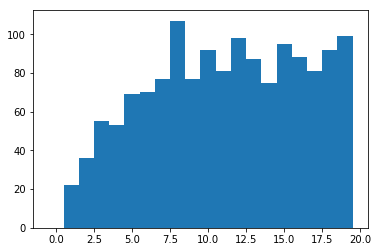

In [35]:
plt.hist(snp_count_dict.values(), bins=np.arange(0,max_count,1)-.5)
plt.suptitle("Number of SNPs per RAD tag, after filtering for max 20 SNPs")
plt.show()

## Exploratory Plots

**20170620**